# Ask the Expert Special Edition - Developing Superior Models using SAS Viya and Open Source Together

In [2]:
from IPython.display import Image
def display_image(img):
    ''' Display images for presentation'''
    return Image(url=r'https://raw.githubusercontent.com/pestyld/Python-Integration-to-SAS-Viya/master/images/' + img, embed=True)

In [4]:
display_image('MR_01_title.png')

HTTPError: HTTP Error 404: Not Found

# Agenda

Today we will go through the steps of predictive modeling using CAS Actionsets

1. Visual Modeling and Model Studio Pipelines 
2. Introduction to using Actionsets for Predictive Modeling
3. Connect to CAS and Load the Data
4. Explore Data
5. Partition Data
6. Run a Decision Tree and Gradient Boosting Model
7. Run a Python Gradient Boosting Model
8. Introduce the Data Science Automated Machine Learning Pipeline
9. Conclusion

![title](images/MR_02_pipeline.png)

![title](images/MR_03_pipeline_nodes.png)

# Connect to CAS and load the data

**Import the swat (SAS Wrapper for Analytic Transfer) package and connect to CAS**

In [1]:
import swat
from pprint import pprint
from matplotlib import pyplot as plt
import pandas as pd
import sys
import collections
%matplotlib inline

# Host, port, username, password
conn = swat.CAS("http://server.demo.sas.com/cas-shared-default-http/", username='sasdemo', password="Orion123")

![title](images/MR_04_ActionSets.png)

In [2]:
# Load actionsets for analysis (for data prep, modeling, assessing)
actionsets = ['cardinality', 'sampling', 'decisionTree', 'percentile', 'autotune', 'dataSciencePilot']
[conn.builtins.loadactionset(i) for i in actionsets]

NOTE: Added action set 'cardinality'.
NOTE: Added action set 'sampling'.
NOTE: Added action set 'decisionTree'.
NOTE: Added action set 'percentile'.
NOTE: Added action set 'autotune'.
NOTE: Added action set 'dataSciencePilot'.


[[actionset]
 
  'cardinality'
 
 + Elapsed: 0.000501s, user: 0.000365s, sys: 0.000116s, mem: 0.222mb,
 [actionset]
 
  'sampling'
 
 + Elapsed: 0.00202s, sys: 0.002s, mem: 0.262mb,
 [actionset]
 
  'decisionTree'
 
 + Elapsed: 0.00141s, user: 0.00104s, sys: 0.000348s, mem: 0.239mb,
 [actionset]
 
  'percentile'
 
 + Elapsed: 0.000283s, user: 0.000181s, sys: 8.4e-05s, mem: 0.221mb,
 [actionset]
 
  'autotune'
 
 + Elapsed: 0.000975s, user: 8.3e-05s, sys: 0.000874s, mem: 0.241mb,
 [actionset]
 
  'dataSciencePilot'
 
 + Elapsed: 0.0011s, user: 0.000745s, sys: 0.000336s, mem: 0.222mb]

## Upload data into CAS

In [3]:
conn.loadTable(path = 'home_equity_final.sashdat', caslib = 'public',
              casout = {
                  'name':'home_equity_final',
                  'caslib':'casuser',
                  'replace':True
              })
Home_Equity = conn.CASTable('home_equity_final', caslib = 'casuser')

NOTE: Cloud Analytic Services made the file home_equity_final.sashdat available as table HOME_EQUITY_FINAL in caslib CASUSER(sasdemo).


# Explore Data

In [4]:
Home_Equity.table.columnInfo()

,Column,Label,ID,Type,RawLength,FormattedLength,Format,NFL,NFD
0,BAD,,1,double,8,12,,0,0
1,LOAN,,2,double,8,12,,0,0
2,MORTDUE,,3,double,8,12,,0,0
3,VALUE,,4,double,8,12,,0,0
4,REASON,,5,varchar,7,7,,0,0
5,JOB,,6,varchar,7,7,,0,0
6,YOJ,,7,double,8,12,,0,0
7,DEROG,,8,double,8,12,,0,0
8,DELINQ,,9,double,8,12,,0,0
9,CLAGE,,10,double,8,12,,0,0


In [5]:
Home_Equity.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,IMP_MORTDUE,IMP_NINQ,IMP_VALUE,IMP_YOJ,IMP_CITY,IMP_JOB,IMP_REASON,YEAR,QTR,DATE_SINCE_LAST_APP
0,1.0,1100.0,25860.0,39025.0,HOMEIMP,OTHER,10.5,0.0,0.0,94.0,25860.0000,1.000000,39025.000000,10.500000,Oregon,OTHER,HOMEIMP,2020.0,2.0,1105.0
1,1.0,1300.0,70053.0,68400.0,HOMEIMP,OTHER,7.0,0.0,2.0,122.0,70053.0000,0.000000,68400.000000,7.000000,Churchton,OTHER,HOMEIMP,2020.0,4.0,916.0
2,1.0,1500.0,13500.0,16700.0,HOMEIMP,OTHER,4.0,0.0,0.0,149.0,13500.0000,1.000000,16700.000000,4.000000,Orcas,OTHER,HOMEIMP,2018.0,3.0,1749.0
3,1.0,1500.0,NaN,NaN,,,NaN,NaN,NaN,NaN,73760.8172,1.186055,101776.048741,8.922268,Hastings,OTHER,DEBTCON,2020.0,4.0,932.0
4,0.0,1700.0,97800.0,112000.0,HOMEIMP,OFFICE,3.0,0.0,0.0,93.0,97800.0000,0.000000,112000.000000,3.000000,Wilmington,OFFICE,HOMEIMP,2021.0,1.0,816.0


### Check for missing look at descriptive statistics

In [6]:
Home_Equity.summary()

,Column,Min,Max,N,NMiss,Mean,Sum,Std,StdErr,Var,USS,CSS,CV,TValue,ProbT,Skewness,Kurtosis
0,BAD,0.000000,1.000000,5960.0,0.0,0.199497,1.189000e+03,0.399656,0.005177,1.597245e-01,1.189000e+03,9.517985e+02,200.331950,38.536557,2.720203e-290,1.504317,0.263057
1,LOAN,1100.000000,89900.000000,5960.0,0.0,18607.969799,1.109035e+08,11207.480417,145.172668,1.256076e+08,2.812185e+12,7.484958e+11,60.229464,128.178190,0.000000e+00,2.023781,6.932590
2,MORTDUE,2063.000000,399550.000000,5442.0,518.0,73760.817200,4.014064e+08,44457.609458,602.652327,1.976479e+09,4.036208e+13,1.075402e+13,60.272664,122.393649,0.000000e+00,1.814481,6.481866
3,VALUE,8000.000000,855909.000000,5848.0,112.0,101776.048741,5.951863e+08,57385.775334,750.413385,3.293127e+09,7.983063e+13,1.925491e+13,56.384362,135.626644,0.000000e+00,3.053344,24.362805
4,YOJ,0.000000,41.000000,5445.0,515.0,8.922268,4.858175e+04,7.573982,0.102642,5.736521e+01,7.457556e+05,3.122962e+05,84.888530,86.926047,0.000000e+00,0.988460,0.372072
5,DEROG,0.000000,10.000000,5252.0,708.0,0.254570,1.337000e+03,0.846047,0.011674,7.157951e-01,4.099000e+03,3.758640e+03,332.343880,21.805933,5.478603e-101,5.320870,36.872763
6,DELINQ,0.000000,15.000000,5380.0,580.0,0.449442,2.418000e+03,1.127266,0.015369,1.270728e+00,7.922000e+03,6.835248e+03,250.814336,29.244135,1.326786e-174,4.023150,23.565449
7,CLAGE,0.000000,1168.000000,5652.0,308.0,179.771762,1.016070e+06,85.809396,1.141389,7.363252e+03,2.242704e+08,4.160974e+07,47.732411,157.502593,0.000000e+00,1.343188,7.599865
8,NINQ,0.000000,17.000000,5450.0,510.0,1.186055,6.464000e+03,1.728675,0.023416,2.988317e+00,2.395000e+04,1.628334e+04,145.749978,50.651202,0.000000e+00,2.621984,9.786507
9,CLNO,0.000000,71.000000,5738.0,222.0,21.296096,1.221970e+05,10.138933,0.133848,1.027980e+02,3.192071e+06,5.897519e+05,47.609351,159.106532,0.000000e+00,0.775052,1.157673


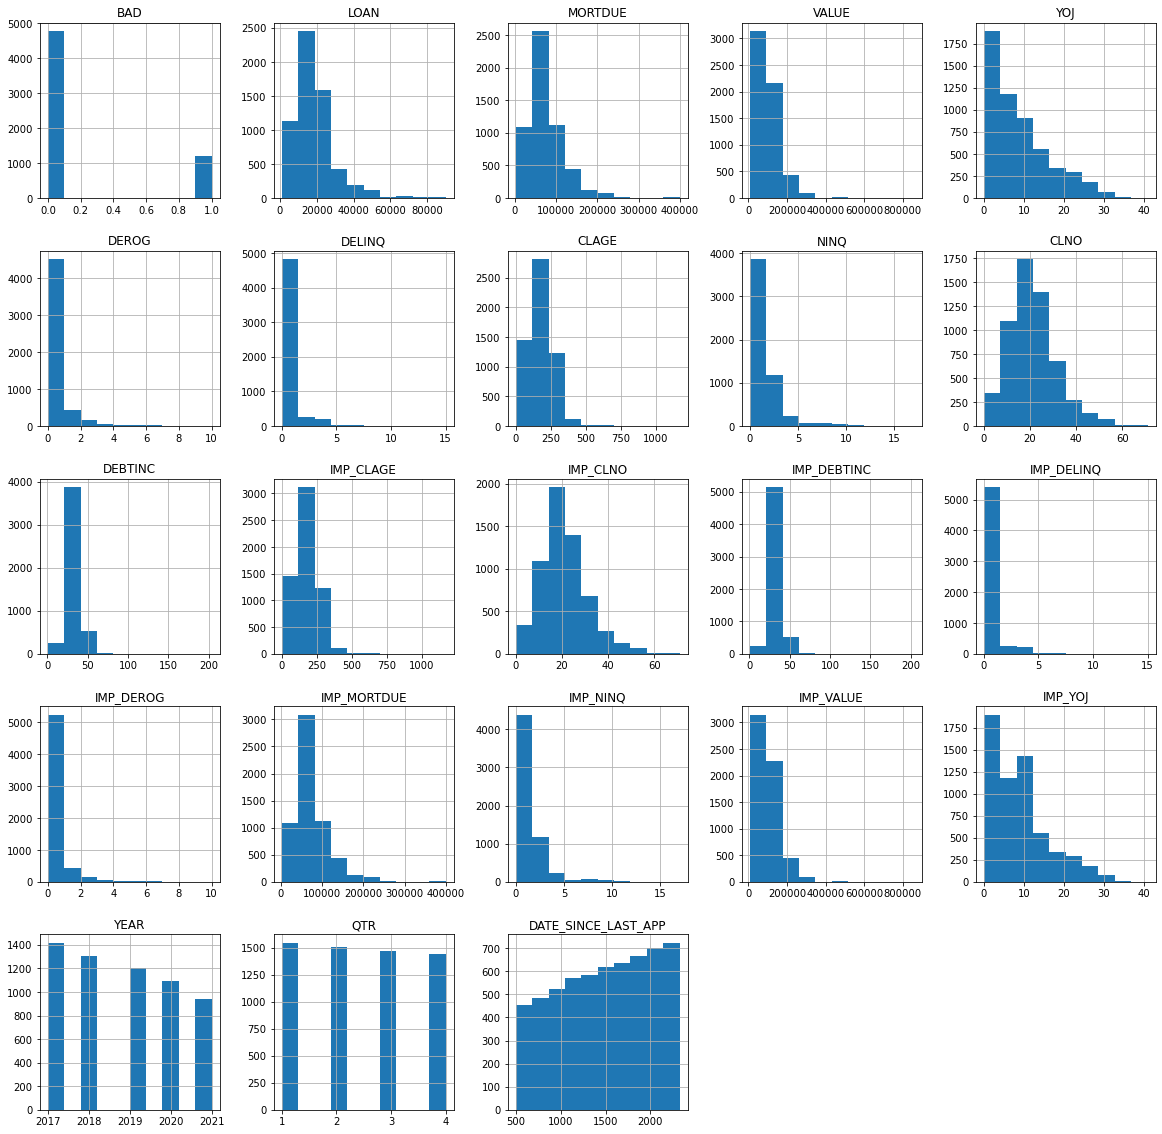

In [7]:
# Use the built in hist() method to plot the distribution of every variable
# Hist method using a random sample of 10,000 rows by default. Options are available for sampling method and sample size.
Home_Equity.hist(figsize = (20, 20));

## Set Variable Shortcuts

In [8]:
# Set variables for later use by models
## For models that can handle missing values
target              = "BAD"
class_inputs        = ["REASON", "JOB", "REGION"]
interval_inputs     = ["CLAGE", "CLNO", "DEBTINC", "LOAN", "MORTDUE", "VALUE", "YOJ", "NINQ", "DEROG", "DELINQ", "DATE_SINCE_LAST_APP"]
class_vars          = [target] + class_inputs
all_inputs          = interval_inputs + class_inputs

## For models that can't handle missing values
imp_class_inputs    = ["IMP_REASON","IMP_JOB", "REGION"]
imp_interval_inputs = ["IMP_CLAGE", "IMP_CLNO", "IMP_DEBTINC", "LOAN", "IMP_MORTDUE", "IMP_VALUE", "IMP_YOJ", "IMP_NINQ", "IMP_DEROG", "IMP_DELINQ", "DATE_SINCE_LAST_APP"]
imp_class_vars      = [target] + imp_class_inputs
imp_all_inputs      = imp_interval_inputs + imp_class_inputs

# Partition data into training and validation data 

In [9]:
#create training data set to be 70% of the data and validation 30%
conn.sampling.stratified(
  table={"name":"Home_Equity_final", "groupBy":target},
  output={"casOut":{"name":"Home_Equity_p", "replace":True}, "copyVars":"ALL"},
  samppct=70,
  seed=1234,
  partind=True
)

NOTE: Stratified sampling is in effect.
NOTE: Using SEED=1234 for sampling.


[OutputCasTables]

              casLib           Name Label  Rows  Columns                                           casTable
 0  CASUSER(sasdemo)  Home_Equity_p        5960       34  CASTable('Home_Equity_p', caslib='CASUSER(sasd...

[STRAFreq]

 Frequencies
 
    ByGrpID           BAD  NObs  NSamp
 0        0             0  4771   3340
 1        1             1  1189    832

+ Elapsed: 0.195s, user: 0.197s, sys: 0.0153s, mem: 91.1mb

In [10]:
Home_Equity_p = conn.CASTable("Home_Equity_p", caslib="CASUSER")

# Run Models

Run a Decision Tree & Gradient Boosting Model

In [11]:
#Decision Tree
conn.decisionTree.dtreeTrain(
  table={
    "name":"Home_Equity_p",
    "where":"strip(put(_partind_, best.))='1'"
  },
  inputs=all_inputs,
  target="bad",
  nominals=class_vars,
  crit="GAIN",
  prune=True,
  varImp=True,
  missing="USEINSEARCH",
  casOut={"name":"tree_model", "replace":True}
)

# Score 
conn.decisionTree.dtreeScore(
  table={"name":"Home_Equity_p"},
  modelTable={"name":"tree_model"},
  casOut={"name":"_scored_tree", "replace":True},
  copyVars={"bad", "_partind_"}
)

# Create p_bad0 and p_bad1 as _dt_predp_ is the probability of event in _dt_predname_
conn.dataStep.runCode(code = """
data _scored_tree; 
    length p_bad1 p_bad0 8.;
    set _scored_tree; 
    if _dt_predname_=1 then do; 
        p_bad1=_dt_predp_; 
        p_bad0=1-p_bad1; 
    end; 
    if _dt_predname_=0 then do; 
        p_bad0=_dt_predp_; 
        p_bad1=1-p_bad0; 
    end; 
run;
"""
)


NOTE: Character values have been converted to numeric values at the places given by: (Line):(Column).
      0:79    0:176
NOTE: Duplicate messages output by DATA step:
NOTE: Character values have been converted to numeric values at the places given by: (Line):(Column).  (occurred 32 times)
      0:79    0:176  (occurred 32 times)


[InputCasTables]

              casLib          Name  Rows  Columns                                           casTable
 0  CASUSER(sasdemo)  _scored_tree  5960       14  CASTable('_scored_tree', caslib='CASUSER(sasde...

[OutputCasTables]

              casLib          Name  Rows  Columns  Append Promoted                                           casTable
 0  CASUSER(sasdemo)  _scored_tree  5960       16     NaN        N  CASTable('_scored_tree', caslib='CASUSER(sasde...

+ Elapsed: 0.0152s, user: 0.028s, sys: 0.0333s, mem: 21.2mb

In [12]:
#Gradient Boosting
conn.decisionTree.gbtreeTrain(
  table={
    "name":"Home_Equity_p",
    "where":"strip(put(_partind_, best.))='1'"
  },
  inputs=all_inputs,
  nominals=class_vars,
  target=target,
  nTree=10,
  nBins=20,
  maxLevel=6,
  varImp=True,
  missing="USEINSEARCH",
  casOut={"name":"gb_model", "replace":True}
)

# Score 
conn.decisionTree.gbtreeScore(
  table={"name":"Home_Equity_p"},
  modelTable={"name":"gb_model"},
  casOut={"name":"_scored_gb", "replace":True},
  copyVars={ target, "_partind_"}
)

# Create p_bad0 and p_bad1 as _gbt_predp_ is the probability of event in _gbt_predname_
conn.dataStep.runCode(
  code="""data _scored_gb; 
    set _scored_gb; 
    if _gbt_predname_=1 then do; 
    p_bad1=_gbt_predp_; 
    p_bad0=1-p_bad1; 
    end; 
    if _gbt_predname_=0 then do; 
    p_bad0=_gbt_predp_; 
    p_bad1=1-p_bad0; 
    end; 
    run;"""
)

NOTE: Character values have been converted to numeric values at the places given by: (Line):(Column).
      0:45    0:136
NOTE: Duplicate messages output by DATA step:
NOTE: Character values have been converted to numeric values at the places given by: (Line):(Column).  (occurred 32 times)
      0:45    0:136  (occurred 32 times)


[InputCasTables]

              casLib        Name  Rows  Columns                                           casTable
 0  CASUSER(sasdemo)  _scored_gb  5960        6  CASTable('_scored_gb', caslib='CASUSER(sasdemo)')

[OutputCasTables]

              casLib        Name  Rows  Columns  Append Promoted                                           casTable
 0  CASUSER(sasdemo)  _scored_gb  5960        8     NaN        N  CASTable('_scored_gb', caslib='CASUSER(sasdemo)')

+ Elapsed: 0.014s, user: 0.0555s, mem: 22.2mb

# Assess the Performance - CAS/Python

Access the two Models

In [13]:
def assess_model(prefix):
    return conn.percentile.assess(
      table={
        "name":"_scored_" + prefix, 
        "where": "strip(put(_partind_, best.))='0'"
      },
      inputs=[{"name":"p_bad1"}],      
      response="bad",
      event="1",
      pVar={"p_bad0"},
      pEvent={"0"}      
    )

treeAssess=assess_model(prefix="tree")    
tree_fitstat =treeAssess.FitStat
tree_rocinfo =treeAssess.ROCInfo
tree_liftinfo=treeAssess.LIFTInfo

gbAssess=assess_model(prefix="gb")    
gb_fitstat =gbAssess.FitStat
gb_rocinfo =gbAssess.ROCInfo
gb_liftinfo=gbAssess.LIFTInfo

In [14]:
# Add new variable to indicate type of model
tree_liftinfo["model"]="DecisionTree"
tree_rocinfo["model"]="DecisionTree"
gb_liftinfo["model"]="GradientBoosting"
gb_rocinfo["model"]="GradientBoosting"

# Append data
all_liftinfo=gb_liftinfo.append(tree_liftinfo, ignore_index=True)
all_rocinfo=gb_rocinfo.append(tree_rocinfo, ignore_index=True)

In [15]:
# Display stacked confusion matrix using Python
print('\n', 'Confusion Matrix Information'.center(42, ' '))
all_rocinfo[round(all_rocinfo['CutOff'], 2) == 0.5][['model', 'TP', 'FP', 'FN', 'TN']].reset_index(drop = True)


        Confusion Matrix Information       


,model,TP,FP,FN,TN
0,GradientBoosting,145.0,19.0,212.0,1412.0
1,DecisionTree,241.0,66.0,116.0,1365.0


In [16]:
all_rocinfo['Misclassification'] = 1 - all_rocinfo['ACC']

print('\n', 'Misclassification Rate Comparison'.center(37, ' '))
miss = all_rocinfo[round(all_rocinfo['CutOff'], 2) == 0.5][['model', 'Misclassification']].reset_index(drop = True)
miss.sort_values('Misclassification')


   Misclassification Rate Comparison  


,model,Misclassification
1,DecisionTree,0.101790
0,GradientBoosting,0.129195


# Draw ROC and lift plots

In [17]:
#print Area under the ROC Curve
print("AUC (using validation data)".center(80, '-'))
all_rocinfo[["model", "C"]].drop_duplicates(keep="first").sort_values(by="C", ascending=False)

--------------------------AUC (using validation data)---------------------------


,model,C
0,GradientBoosting,0.920532
100,DecisionTree,0.883477


Create ROC and Lift plots (using validation data)

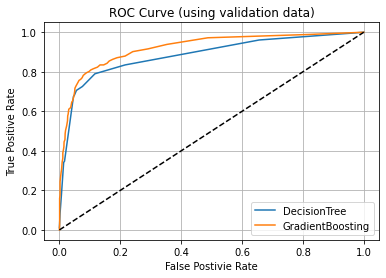

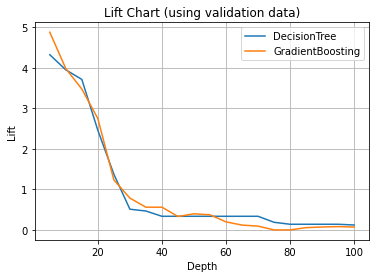

In [18]:
#/* Draw ROC charts */ 
plt.figure()
for key, grp in all_rocinfo.groupby(["model"]):
    plt.plot(grp["FPR"], grp["Sensitivity"], label=key)
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Postivie Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
plt.legend(loc="best")
plt.title("ROC Curve (using validation data)")
plt.show()

#/* Draw lift charts */
plt.figure()
for key, grp in all_liftinfo.groupby(["model"]):
    plt.plot(grp["Depth"], grp["Lift"], label=key)
plt.xlabel("Depth")
plt.ylabel("Lift")
plt.grid(True)
plt.legend(loc="best")
plt.title("Lift Chart (using validation data)")
plt.show();

# Create Gradient Boosting in Python

In [19]:
# Bring specified columns to the client (note: Python models must be run locally)
local_inputs = [target, '_PartInd_'] + imp_all_inputs
local = Home_Equity_p[local_inputs].to_frame()

# Create dummy variables for class inputs (note: scikit-learn cannot have character variables)
local = pd.concat([local, pd.get_dummies(local[imp_class_inputs])], axis = 1).drop(imp_class_inputs, axis = 1)

# Split into training and validation
train = local[local['_PartInd_'] == 1]
valid = local[local['_PartInd_'] == 0]

# Split target and inputs and remove unnecessary variables (note: scikit-learn Gradient Boosting can't handle missing values)
X_train = train.drop(target, axis = 1)
X_valid = valid.drop(target, axis = 1)
y_train = train[target]
y_valid = valid[target]

# Build scikit-learn gradient boosting model using default values
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics  import confusion_matrix, accuracy_score
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
df = pd.DataFrame(dict(actual = y_valid, pred = gb.predict_proba(X_valid)[:,1])) # put results in pandas dataframe

# Predict and assess model
gb_y_score           = gb.predict(X_valid)
gb_misclassification = 1 - accuracy_score(y_valid, gb_y_score)
gb_confusion_matrix  = confusion_matrix(y_valid, gb_y_score)

print('Confusion Matrix\n', gb_confusion_matrix, '\n') # note: scikit-learn reverses True Positives and True Negatives
print('Misclassification Rate\n ', gb_misclassification)

C:\Users\sasmwr\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Confusion Matrix
 [[1395   36]
 [ 139  218]] 

Misclassification Rate
  0.09787472035794187


### Compare Gradient Boosting - Python to our SAS Gradient Boosting Model

In [20]:
pytbl = conn.upload_frame(df, casout=dict(name='Python', replace=True))

# Verify that the Python actuals vs. predicted are in CAS
pytbl.fetch(to = 5)

NOTE: Cloud Analytic Services made the uploaded file available as table PYTHON in caslib CASUSER(sasdemo).
NOTE: The table PYTHON has been created in caslib CASUSER(sasdemo) from binary data uploaded to Cloud Analytic Services.


,actual,pred
0,0.0,0.389005
1,1.0,0.744539
2,0.0,0.735353
3,1.0,0.407900
4,1.0,0.968085


In [21]:
# Assess the Python model using CAS
python_assess = pytbl.percentile.assess(
    inputs   = 'pred',      
    response = 'actual',
    event    = '1',   
)
python_assess.ROCInfo['model'] = 'GradientBoosting - Python'

all_rocinfo['model'] = all_rocinfo['model'] + ' - CAS'
roc_df = pd.concat([all_rocinfo.query('model == "GradientBoosting - CAS"'), python_assess.ROCInfo])
roc_df['Misclassification'] = 1 - roc_df['ACC']

print('\n', 'Misclassification Rate Comparison'.center(37, ' '))
miss = roc_df[round(roc_df['CutOff'], 2) == 0.5][['model', 'Misclassification']].reset_index(drop = True)
miss.sort_values('Misclassification')


   Misclassification Rate Comparison  


,model,Misclassification
1,GradientBoosting - Python,0.097875
0,GradientBoosting - CAS,0.129195


## AutoTune the Decision Tree & Gradient Boosting Models

![title](images/MR_05_autotuning.png)

![title](images/MR_06_autotuning2.png)

In [22]:
conn.autotune.tuneDecisionTree(
  trainOptions=dict(
  table="Home_Equity_p",
  inputs=all_inputs,
  target="bad",
  nominals=class_vars,
  crit="GAIN",
  prune=True,
  varImp=True,
  missing="USEINSEARCH",

  casOut={"name":"tree_model_at", "replace":True}
))

NOTE: Autotune is started for 'Decision Tree' model.
NOTE: Autotune option SEARCHMETHOD='GA'.
NOTE: Autotune option MAXTIME=36000 (sec.).
NOTE: Autotune option SEED=1876970011.
NOTE: Autotune objective is 'Misclassification Error Percentage'.
NOTE: Autotune number of parallel evaluations is set to 4, each using 0 worker nodes.
         Iteration       Evals     Best Objective  Elapsed Time
                 0           1             13.255          0.33
                 1          17             11.242          3.35
                 2          32              10.57          5.77
                 3          46              10.57          7.81
                 4          59              10.57          9.46
                 5          71              10.57         11.46
NOTE: Data was partitioned during tuning, to tune based on validation score; the final model is trained and scored on all data.
NOTE: Autotune time is 12.30 seconds.


[BestConfiguration]

 Best Configuration
 
                             Parameter        Name      Value
 0                          Evaluation  Evaluation         20
 1                 Maximum Tree Levels    MAXLEVEL         16
 2                        Maximum Bins       NBINS         69
 3                           Criterion        CRIT  GAINRATIO
 4  Misclassification Error Percentage   Objective      10.57

[DTreeVarImpInfo]

 Decision Tree for HOME_EQUITY_P_AUTOTUNE_DATA_11FA4B25-9848-604F-9F45-7E73830B6354
 
                Variable  Importance  Std  Count
 0               DEBTINC  642.097725  NaN    6.0
 1                 VALUE  131.927995  NaN    3.0
 2                DELINQ   81.481774  NaN    6.0
 3                 CLAGE   66.352486  NaN    7.0
 4                 DEROG   52.426890  NaN    8.0
 5                  CLNO   38.648586  NaN    9.0
 6                   YOJ   33.386225  NaN    5.0
 7                   JOB   31.846041  NaN    7.0
 8                  NINQ   21.344958  NaN    5.0
 9                  LOAN   10.315714  NaN    3.0
 10              MORTDUE    8.665758  NaN    4.0
 11               REGION    6.025108  NaN    3.0
 12  DATE_SINCE_LAST_APP    1.576300  NaN    1.0

[EncodedName]

         LEVNAME  LEVINDEX VARNAME
 0             1         0  P_BAD1
 1             0         1  P_BAD0

[EncodedTargetName]

   LEVNAME  LEVINDEX VARNAME
 0                 0   I_BAD

[EvaluationHistory]

 Tuner Evaluation History
 
     Evaluation  Iteration  MAXLEVEL  NBINS       CRIT  MisclassErr  EvaluationTime
 0            0          0        11     20       GAIN    13.255034        0.325845
 1            1          1         6     20  CHISQUARE    12.416107        0.586283
 2            2          1        14    100       GAIN    12.472036        0.491589
 3            3          1        18     80  GAINRATIO    11.409396        0.917100
 4            4          1        20     60       GAIN    12.360179        0.505119
 5            5          1         8    160  GAINRATIO    14.373602        0.411325
 6            6          1        12    200  CHISQUARE    12.248322        0.605058
 7            7          1        10    120       GINI    11.241611        0.613608
 8            8          1         4    180       GINI    11.744966        0.599673
 9            9          1        16     40      CHAID    13.814318        0.975242
 10          10          1        11     20       GAIN    13.255034        0.000000
 11          11          1        11    110       GINI    11.744966        0.791423
 12          12          1        20    110       GINI    11.689038        0.886191
 13          13          1         2    110       GINI    14.205817        0.510701
 14          14          1        11    200       GINI    11.968680        0.714583
 15          15          1        11     20       GINI    13.255034        0.225882
 16          16          1        11    110      CHAID    13.143177        1.005801
 17          17          1        11    110       GAIN    12.136465        0.533706
 18          18          2        20     20       GAIN    12.639821        0.665407
 19          19          2        17     96  GAINRATIO    11.744966        0.864420
 20          20          2        16     69  GAINRATIO    10.570470        0.867248
 21          21          2        20    111       GINI    11.521253        0.971629
 22          22          2        15     51  GAINRATIO    11.968680        0.342898
 23          23          2         2    200      CHAID    15.492170        0.568740
 24          24          2         6    164       GINI    11.689038        0.322406
 25          25          2         8    131       GINI    11.297539        0.315831
 26          26          2        16     91  GAINRATIO    11.800895        0.382040
 27          27          2        10    200       GINI    11.912752        0.485457
 28          28          2        10     30       GINI    11.689038        0.203403
 29          29       

In [23]:
conn.autotune.tuneGradientBoostTree(
  trainOptions=dict(
  table="Home_Equity_p",
  inputs=all_inputs,
  target="bad",
  nominals=class_vars,

  casOut={"name":"gb_model_at", "replace":True}
))

NOTE: Autotune is started for 'Gradient Boosting Tree' model.
NOTE: Autotune option SEARCHMETHOD='GA'.
NOTE: Autotune option MAXTIME=36000 (sec.).
NOTE: Autotune option SEED=1876966578.
NOTE: Autotune objective is 'Misclassification Error Percentage'.
NOTE: Early stopping is activated; 'NTREE' will not be tuned.
NOTE: Autotune number of parallel evaluations is set to 4, each using 0 worker nodes.
NOTE: Automatic early stopping is activated with STAGNATION=4;  set EARLYSTOP=false to deactivate.
         Iteration       Evals     Best Objective  Elapsed Time
                 0           1             8.1655          0.89
                 1          25             7.6063         29.27
                 2          46             7.6063         75.19
                 3          65             7.6063        117.75
                 4          83             7.2148        168.48
                 5         102             6.9911        232.00
NOTE: Data was partitioned during tuning, to tune bas

,Parameter,Name,Value
0,Evaluation,Evaluation,99
1,Number of Variables to Try,M,2
2,Learning Rate,LEARNINGRATE,0.57375
3,Sampling Rate,SUBSAMPLERATE,0.5
4,Lasso,LASSO,0
5,Ridge,RIDGE,10
6,Number of Bins,NBINS,64
7,Maximum Tree Levels,MAXLEVEL,7
8,Misclassification Error Percentage,Objective,6.99
,LEVNAME,LEVINDEX,VARNAME


![title](images/MR_07_pipeline_opensource.png)

# Use The Data Science Pilot Action Set

The dsAutoMl action creates a policy-based, scalable, end-to-end automated machine learning pipeline for both regression and classification problems. The only input required from the user is the input data set and the target variable, but optional parameters include the policy parameters for data exploration, variable screening, feature selection, and feature transformation. Overriding the default policy parameters allow a data scientist to configure their pipeline in their data science workflow. In addition, a data scientist may also select additional models to consider. By default, only a decision tree model is included in the pipeline, but neural networks, random forest models, and gradient boosting models are also available.

The dsAutoMl action first explores the data and groups the input variables into categories with the same statistical profile, like the exploreData action. Next the dsAutoMl action screens variables to identify noise variables to exclude from further analysis, like the screenVariables action. Then, the dsAutoMl action generates several new features for the input variables, like the featureMachine action. After there are various new cleaned features, the dsAutoMl action will select features based on selected criterion, like the selectFeatures action.

From here, various pipelines are created using subsets of the selected features, chosen for each pipeline using a feature-representation algorithm. Then the chosen models are added to each pipeline and the hyperparameters for the selected models are optimized, like the modelComposer action of the Autotune action set. These hyperparameters are optimized for the selected objective parameter when cross-validated. By default, classification problems are optimized to have the smallest Misclassification Error Rate (MCE) and regression problems are optimized to have the smallest Average Square Error (ASR). Data scientists can then select their champion and challenger models from the pipelines.

This action returns four CAS tables: the first lists information around the transformation pipelines, the second lists information around the transformed features, the third lists pipeline performance according to the objective parameter and the fourth is an analytical store for scoring any additional input tables.

### Data Science Pilot Action Set - This section will cover feature selection, feature creation and automated pipeline creation

![title](images/MR_09_DataSciencePilot.png)

In [24]:
# Exploration Policy 
expo = {'cardinality': {'lowMediumCutoff':40}}
# Screen Policy 
scpo = {'missingPercentThreshold':35}
# Selection Policy 
sepo = {'criterion': 'SU', 'topk':4}
# Transformation Policy 
trpo = {'entropy': True, 'iqv': True, 'kurtosis': True, 'outlier': True}

## Select Features

The selectFeatures action performs a filter-based selection by the criterion selected in the selectionPolicy (default is the best ten input variables according to the Mutual Information statistic). The criterion available for selection include Chi-Square, Cramer’s V, F-test, G2, Information Value, Mutual Information, Normalized Mutual Information statistic, Pearson correlation, and the Symmetric Uncertainty statistic. This action returns a CAS table listing the variables, their rank according to the selected criterion, and the value of the selected criterion.

In [25]:
conn.dataSciencePilot.screenVariables(
    table = Home_Equity, 
    target = target, 
    casOut = {'name': 'SCREEN_VARIABLES_OUT_PY', 'replace': True}, 
    screenPolicy = {}
)
conn.fetch(table = {'name': 'SCREEN_VARIABLES_OUT_PY'})

,Variable,Recommendation,Reason
0,REASON,keep,passed all screening tests
1,JOB,keep,passed all screening tests
2,CITY,remove,low target mutual information
3,STATE,keep,passed all screening tests
4,DIVISION,keep,passed all screening tests
5,REGION,remove,low target mutual information
6,IMP_CITY,remove,low target mutual information
7,IMP_JOB,keep,passed all screening tests
8,IMP_REASON,keep,passed all screening tests
9,LOAN,keep,passed all screening tests


## Feature Machine

The featureMachine action creates an automated and parallel generation of features. The featureMachine action first explores the data and groups the input variables into categories with the same statistical profile, like the exploreData action. Next the featureMachine action screens variables to identify noise variables to exclude from further analysis, like the screenVariables action. Finally, the featureMachine action generates new features by using the available structured pipelines:

    Missing indicator addition.
    Mode imputation and rare value grouping.
    Missing level and rare value grouping.
    Median imputation.
    Mode imputation and label encoding.
    Missing level and label encoding.
    Yeo-Johnson transformation and median imputation.
    Box-Cox transformation.
    Quantile binning with missing bins.
    Regression tree binning.
    Decision tree binning.
    MDLP binning.
    Target encoding.
    Date, time, and datetime transformations.
    
Depending on the parameters specified in the transformationPolicy, the featureMachine action can generate several features for each input variable. This action returns four CAS tables: the first lists information around the transformation pipelines, the second lists information around the transformed features, the third is the input table scored with the transformed features, and the fourth is an analytical store for scoring any additional input tables.

In [26]:
conn.dataSciencePilot.featureMachine(
    table = Home_Equity, 
    target = target, 
    copyVars = target, 
    explorationPolicy = expo, 
    screenPolicy = scpo, 
    transformationPolicy = trpo, 
    transformationOut       = {"name" : "TRANSFORMATION_OUT", "replace" : True},
    featureOut              = {"name" : "FEATURE_OUT", "replace" : True},
    casOut                  = {"name" : "CAS_OUT", "replace" : True},
    saveState               = {"name" : "ASTORE_OUT", "replace" : True}  
)

,casLib,Name,Rows,Columns,casTable
0,CASUSER(sasdemo),TRANSFORMATION_OUT,36,21,"CASTable('TRANSFORMATION_OUT', caslib='CASUSER..."
1,CASUSER(sasdemo),FEATURE_OUT,129,9,"CASTable('FEATURE_OUT', caslib='CASUSER(sasdem..."
2,CASUSER(sasdemo),CAS_OUT,5960,130,"CASTable('CAS_OUT', caslib='CASUSER(sasdemo)')"
3,CASUSER(sasdemo),ASTORE_OUT,1,2,"CASTable('ASTORE_OUT', caslib='CASUSER(sasdemo)')"


In [27]:
conn.fetch(table = {'name': 'TRANSFORMATION_OUT'})

,FTGPipelineId,Name,NVariables,IsInteraction,ImputeMethod,OutlierMethod,OutlierTreat,OutlierArgs,FunctionMethod,FunctionArgs,MapIntervalArgs,HashMethod,HashArgs,DateTimeMethod,DiscretizeMethod,DiscretizeArgs,CatTransMethod,CatTransArgs,InteractionMethod,InteractionSynthesizer
0,1.0,miss_ind,5.0,,,,,NaN,,,NaN,MissIndicator,2.0,,,NaN,Label (Sparse One-Hot),NaN,,
1,2.0,grp_rare2,2.0,,,,,NaN,,,NaN,,NaN,,,NaN,Group Rare,5.0,,
2,3.0,hc_tar_frq_rat,4.0,,,,,NaN,,,10.0,,NaN,,,NaN,,NaN,,
3,4.0,hc_lbl_cnt,4.0,,,,,NaN,,,0.0,,NaN,,,NaN,,NaN,,
4,5.0,hc_cnt,4.0,,,,,NaN,,,0.0,,NaN,,,NaN,,NaN,,
5,6.0,hc_cnt_log,4.0,,,,,NaN,Log,e,0.0,,NaN,,,NaN,,NaN,,
6,7.0,lchehi_lab,4.0,,,,,NaN,,,NaN,,NaN,,,NaN,Label (Sparse One-Hot),0.0,,
7,8.0,lcnhenhi_grp_rare,1.0,,,,,NaN,,,NaN,,NaN,,,NaN,Group Rare,5.0,,
8,9.0,lcnhenhi_dtree5,1.0,,,,,NaN,,,NaN,,NaN,,,NaN,DTree,5.0,,
9,10.0,lcnhenhi_dtree10,1.0,,,,,NaN,,,NaN,,NaN,,,NaN,DTree,10.0,,


In [28]:
conn.fetch(table = {'name': 'FEATURE_OUT'})

,FeatureId,Name,IsNominal,FTGPipelineId,NInputs,InputVar1,InputVar2,InputVar3,Label
0,1.0,all_l_oks_dtree_10_APPDATE,1.0,33.0,1.0,APPDATE,,,"APPDATE: Low (outlier, kurtosis, skewness) - t..."
1,2.0,all_l_oks_dtree_5_APPDATE,1.0,32.0,1.0,APPDATE,,,"APPDATE: Low (outlier, kurtosis, skewness) - f..."
2,3.0,cpy_int_med_imp_APPDATE,0.0,34.0,1.0,APPDATE,,,APPDATE: Low missing rate - median imputation
3,4.0,all_l_oks_dtree_10_var_1_,1.0,33.0,1.0,DATE_SINCE_LAST_APP,,,"DATE_SINCE_LAST_APP: Low (outlier, kurtosis, s..."
4,5.0,all_l_oks_dtree_5_var_1_,1.0,32.0,1.0,DATE_SINCE_LAST_APP,,,"DATE_SINCE_LAST_APP: Low (outlier, kurtosis, s..."
5,6.0,cpy_int_med_imp_var_1_,0.0,34.0,1.0,DATE_SINCE_LAST_APP,,,DATE_SINCE_LAST_APP: Low missing rate - median...
6,7.0,cpy_int_med_imp_DEBTINC,0.0,34.0,1.0,DEBTINC,,,DEBTINC: Low missing rate - median imputation
7,8.0,hk_dtree_disct10_DEBTINC,1.0,22.0,1.0,DEBTINC,,,DEBTINC: High kurtosis - ten bin decision tree...
8,9.0,hk_dtree_disct5_DEBTINC,1.0,21.0,1.0,DEBTINC,,,DEBTINC: High kurtosis - five bin decision tre...
9,10.0,hk_yj_0_DEBTINC,0.0,18.0,1.0,DEBTINC,,,DEBTINC: High kurtosis - Yeo-Johnson(lambda=0)...


In [29]:
conn.fetch(table = {'name': 'CAS_OUT'})

,BAD,all_l_oks_dtree_10_APPDATE,all_l_oks_dtree_5_APPDATE,cpy_int_med_imp_APPDATE,all_l_oks_dtree_10_var_1_,all_l_oks_dtree_5_var_1_,cpy_int_med_imp_var_1_,cpy_int_med_imp_DEBTINC,hk_dtree_disct10_DEBTINC,hk_dtree_disct5_DEBTINC,hc_cnt_log_IMP_CITY,hc_lbl_cnt_IMP_CITY,hc_tar_frq_rat_IMP_CITY,cpy_nom_mode_imp_lab_IMP_JOB,lchehi_lab_IMP_JOB,cpy_nom_mode_imp_lab_IMP_REASON,cpy_nom_miss_lev_lab_JOB,lchehi_lab_JOB,cpy_nom_miss_lev_lab_REASON,cpy_nom_mode_imp_lab_STATE
0,1.0,8.0,3.0,22040.0,3.0,3.0,1105.0,34.818262,0.0,0.0,2.302585,187.0,0.700000,3.0,3.0,2.0,3.0,3.0,2.0,50.0
1,1.0,9.0,4.0,22229.0,2.0,2.0,916.0,34.818262,0.0,0.0,1.945910,289.0,0.500000,3.0,3.0,2.0,3.0,3.0,2.0,21.0
2,1.0,5.0,1.0,21396.0,6.0,5.0,1749.0,34.818262,0.0,0.0,1.945910,282.0,0.500000,3.0,3.0,2.0,3.0,3.0,2.0,48.0
3,1.0,9.0,4.0,22213.0,2.0,2.0,932.0,34.818262,0.0,0.0,3.178054,41.0,0.708333,3.0,3.0,1.0,0.0,0.0,0.0,10.0
4,0.0,9.0,4.0,22329.0,2.0,2.0,816.0,34.818262,0.0,0.0,4.127134,2.0,0.838710,2.0,2.0,2.0,2.0,2.0,2.0,5.0
5,1.0,5.0,1.0,21534.0,6.0,5.0,1611.0,37.113614,8.0,4.0,3.367296,22.0,0.793103,3.0,3.0,2.0,3.0,3.0,2.0,48.0
6,1.0,7.0,2.0,21936.0,4.0,4.0,1209.0,34.818262,0.0,0.0,3.258097,34.0,0.769231,3.0,3.0,2.0,3.0,3.0,2.0,10.0
7,1.0,6.0,1.0,21804.0,5.0,5.0,1341.0,36.884894,7.0,3.0,2.833213,77.0,0.823529,3.0,3.0,2.0,3.0,3.0,2.0,48.0
8,1.0,5.0,1.0,21724.0,6.0,5.0,1421.0,34.818262,0.0,0.0,2.484907,136.0,0.583333,3.0,3.0,2.0,3.0,3.0,2.0,48.0
9,1.0,5.0,1.0,21713.0,6.0,5.0,1432.0,34.818262,0.0,0.0,2.302585,184.0,0.500000,5.0,5.0,2.0,5.0,5.0,2.0,31.0


## Data Science Automated Machine Learning Pipeline

The [dsAutoMl action]creates a policy-based, scalable, end-to-end automated machine learning pipeline for both regression and classification problems. The only input required from the user is the input data set and the target variable, but optional parameters include the policy parameters for data exploration, variable screening, feature selection, and feature transformation.  Overriding the default policy parameters allow a data scientist to configure their pipeline in their data science workflow. In addition, a data scientist may also select additional models to consider. By default, only a decision tree model is included in the pipeline, but neural networks, random forest models, and gradient boosting models are also available. 

![title](images/MR_08_auto_pipeline.png)

In [30]:
conn.dataSciencePilot.dsAutoMl(
    table = Home_Equity,
    target = target, 
    explorationPolicy = expo, 
    screenPolicy = scpo, 
    selectionPolicy = sepo,
    transformationPolicy = trpo,
     modelTypes              = ["decisionTree","gradBoost"],
        objective               = "ASE",
        sampleSize              = 10,
        topKPipelines           = 10,
        kFolds                  = 5,
        transformationOut       = {"name" : "TRANSFORMATION_OUT_PY", "replace" : True},
        featureOut              = {"name" : "FEATURE_OUT_PY", "replace" : True},
        pipelineOut             = {"name" : "PIPELINE_OUT_PY", "replace" : True},
        saveState               = {"name" : "ASTORE_OUT_PY", "replace" : True} 
)

NOTE: Added action set 'autotune'.
NOTE: Added action set 'decisionTree'.
NOTE: Early stopping is activated; 'NTREE' will not be tuned.
NOTE: Added action set 'autotune'.
NOTE: Added action set 'decisionTree'.
NOTE: Early stopping is activated; 'NTREE' will not be tuned.
NOTE: Added action set 'autotune'.
NOTE: The number of bins will not be tuned since all inputs are nominal.
NOTE: Added action set 'decisionTree'.
NOTE: The Hyperparameter Importance results table is not created since data is insufficient to calculate importance values.
NOTE: Early stopping is activated; 'NTREE' will not be tuned.
NOTE: The number of bins will not be tuned since all inputs are nominal.
NOTE: Added action set 'autotune'.
NOTE: The number of bins will not be tuned since all inputs are nominal.
NOTE: Added action set 'decisionTree'.
NOTE: The Hyperparameter Importance results table is not created since data is insufficient to calculate importance values.
NOTE: Early stopping is activated; 'NTREE' will not

[list]

 [Decision Tree for __TEMP_FEATURE_MACHINE_CASOUT___AUTOTUNE_DATA_11FA4B25-9848-604F-9F45-7E73830B6354
 
                            Descr        Value
 0           Number of Tree Nodes   437.000000
 1         Max Number of Branches     2.000000
 2               Number of Levels    15.000000
 3               Number of Leaves   219.000000
 4                 Number of Bins   100.000000
 5         Minimum Size of Leaves     5.000000
 6         Maximum Size of Leaves   612.000000
 7            Number of Variables     6.000000
 8   Confidence Level for Pruning     0.250000
 9    Number of Observations Used  5960.000000
 10   Misclassification Error (%)    11.895973,
                           Descr                             Value
 0  Number of Observations Read                              5960
 1  Number of Observations Used                              5960
 2  Misclassification Error (%)                      11.895973154,
          LEVNAME  LEVINDEX VARNAME
 0             1         0  P_BAD1
 1             0         1  P_BAD0,
    LEVNAME  LEVINDEX VARNAME
 0                 0   I_BAD,
  ROC Information for _AUTOTUNE_DEFAULT_SCORE_TABLE_
 
    Variable Event  CutOff      TP      FP      FN      TN  Sensitivity  Specificity   KS       KS2    F_HALF       FPR       ACC       FDR        F1         C     Gini     Gamma       Tau  MISCEVENT       FNR
 0    P_BAD0     0    0.00  4771.0  1189.0     0.0     0.0     1.000000     0.000000  0.0  0.000000  0.833770  1.000000  0.800503  0.199497  0.889200  0.917425  0.83485  0.859642  0.266692   0.199497  0.000000
 1    P_BAD0     0    0.01  4771.0  1019.0     0.0   170.0     1.000000     0.142977  0.0  0.142977  0.854069  0.857023  0.829027  0.175993  0.903513  0.917425  0.83485  0.859642  0.266692   0.170973  0.000000
 2    P_BAD0     0    0.02  4771.0  1019.0     0.0   170.0     1.000000     0.142977  0.0  0.142977  0.854069  0.857023  0.829027  0.175993  0.903513  0.917425  0.83485  0.859642  0.266692   0.170973  0.000000
 3    P_BAD0     0    0.03  4771.0  1019.0     0.0   170.0     1.000000     0.142977  0.0  0.142977  0.854069  0.857023  0.829027  0.175993  0.903513  0.917425  0.83485  0.859642  0.266692   0.170973  0.000000
 4    P_BAD0     0    0.04  4771.0  1019.0     0.0   170.0     1.000000     0.142977  0.0  0.142977  0.854069  0.857023  0.829027  0.175993  0.903513  0.917425  0.83485  0.859642  0.266692   0.170973  0.000000
 5    P_BAD0     0    0.05  4771.0  1019.0     0.0   170.0     1.000000     0.142977  0.0  0.142977  0.854069  0.857023  0.829027  0.175993  0.903513  0.917425  0.83485  0.859642  0.266692   0.170973  0.000000
 6    P_BAD0     0    0.06  4771.0  1019.0     0.0   170.0     1.000000     0.142977  0.0  0.142977  0.854069  0.857023  0.829027  0.175993  0.903513  0.917425  0.83485  0.859642  0.266692   0.170973  0.000000
 7    P_BAD0     0    0.07  4771.0  1019.0     0.0   170.0     1.000000     0.142977  0.0  0.142977  0.854069  0.857023  0.829027  0.175993  0.903513  0.917425  0.83485  0.859642  0.266692   0.170973  0.000000
 8    P_BAD0     0    0.08  4771.0  1019.0     0.0   170.0     1.000000     0.142977  0.0  0.142977  0.854069  0.857023  0.829027  0.175993  0.903513  0.917425  0.83485  0.859642  0.266692   0.170973  0.000000
 9    P_BAD0     0    0.09  4766.0   967.0     5.0   222.0     0.998952     0.186712  0.0  0.185664  0.860196  0.813288  0.836913  0.168673  0.907464  0.917425  0.83485  0.859642  0.266692   0.163087  0.001048
 10   P_BAD0     0    0.10  4760.0   912.0    11.0   277.0     0.997694     0.232969  0.0  0.230663  0.866747  0.767031  0.845134  0.160790  0.911615  0.917425  0.83485  0.859642  0.266692   0.154866  0.002306
 11   P_BAD0     0    0.11  4760.0   912.0    11.0   277.0     0.997694     0.232969  0.0  0.230663  0.866747  0.767031  0.845134  0.160790  0.911615  0.917425  0.83485  0.859642  0.266692   0.154866  0.002306
 12   P_BAD0     0    0.12  4760.0   912.0    11.0   277.0     0.997694     0.232969  0.0  0.230663  0.8

In [31]:
conn.fetch(table = {'name': 'TRANSFORMATION_OUT_PY'})

,FTGPipelineId,Name,NVariables,IsInteraction,ImputeMethod,OutlierMethod,OutlierTreat,OutlierArgs,FunctionMethod,FunctionArgs,MapIntervalArgs,HashMethod,HashArgs,DateTimeMethod,DiscretizeMethod,DiscretizeArgs,CatTransMethod,CatTransArgs,InteractionMethod,InteractionSynthesizer
0,1.0,grp_rare2,2.0,,,,,NaN,,,NaN,,NaN,,,NaN,Group Rare,5.0,,
1,2.0,ho_winsor,2.0,,Median,Modified IQR,Winsor,0.0,,,NaN,,NaN,,,NaN,,NaN,,
2,3.0,ho_quan_disct5,2.0,,,Modified IQR,Trim,0.0,,,NaN,,NaN,,Equal-Freq (Quantile),5.0,,NaN,,
3,4.0,ho_quan_disct10,2.0,,,Modified IQR,Trim,0.0,,,NaN,,NaN,,Equal-Freq (Quantile),10.0,,NaN,,
4,5.0,ho_dtree_disct5,2.0,,,,,NaN,,,NaN,,NaN,,DTree,5.0,,NaN,,
5,6.0,ho_dtree_disct10,2.0,,,,,NaN,,,NaN,,NaN,,DTree,10.0,,NaN,,
6,7.0,cpy_int_med_imp,2.0,,Median,,,NaN,,,NaN,,NaN,,,NaN,,NaN,,


In [32]:
conn.fetch(table = {'name': 'FEATURE_OUT_PY'})

,FeatureId,Name,IsNominal,FTGPipelineId,NInputs,InputVar1,InputVar2,InputVar3,Label,RankCrit,BestTransRank,GlobalIntervalRank,GlobalNominalRank,GlobalRank,IsGenerated
0,1.0,cpy_int_med_imp_IMP_DEBTINC,0.0,7.0,1.0,IMP_DEBTINC,,,IMP_DEBTINC: Low missing rate - median imputation,0.086698,1.0,1.0,NaN,3.0,1.0
1,2.0,ho_dtree_disct10_IMP_DEBTINC,1.0,6.0,1.0,IMP_DEBTINC,,,IMP_DEBTINC: High outlier - ten bin decision t...,0.074616,4.0,NaN,6.0,8.0,0.0
2,3.0,ho_dtree_disct5_IMP_DEBTINC,1.0,5.0,1.0,IMP_DEBTINC,,,IMP_DEBTINC: High outlier - five bin decision ...,0.099038,1.0,NaN,1.0,1.0,1.0
3,4.0,ho_quan_disct10_IMP_DEBTINC,1.0,4.0,1.0,IMP_DEBTINC,,,IMP_DEBTINC: High outlier - robust IQR + ten b...,0.085006,3.0,NaN,3.0,4.0,0.0
4,5.0,ho_quan_disct5_IMP_DEBTINC,1.0,3.0,1.0,IMP_DEBTINC,,,IMP_DEBTINC: High outlier - robust IQR + five ...,0.095312,2.0,NaN,2.0,2.0,1.0
5,6.0,ho_winsor_IMP_DEBTINC,0.0,2.0,1.0,IMP_DEBTINC,,,IMP_DEBTINC: High outlier - winsorize,0.081042,2.0,2.0,NaN,7.0,1.0
6,7.0,cpy_int_med_imp_IMP_DELINQ,0.0,7.0,1.0,IMP_DELINQ,,,IMP_DELINQ: Low missing rate - median imputation,0.068430,1.0,3.0,NaN,9.0,1.0
7,8.0,ho_dtree_disct10_IMP_DELINQ,1.0,6.0,1.0,IMP_DELINQ,,,IMP_DELINQ: High outlier - ten bin decision tr...,0.065238,3.0,NaN,7.0,11.0,0.0
8,9.0,ho_dtree_disct5_IMP_DELINQ,1.0,5.0,1.0,IMP_DELINQ,,,IMP_DELINQ: High outlier - five bin decision t...,0.065238,3.0,NaN,7.0,11.0,0.0
9,10.0,ho_quan_disct10_IMP_DELINQ,1.0,4.0,1.0,IMP_DELINQ,,,IMP_DELINQ: High outlier - robust IQR + ten bi...,0.082688,1.0,NaN,4.0,5.0,1.0


In [33]:
conn.fetch(table = {'name': 'PIPELINE_OUT_PY'})

,PipelineId,ModelType,MLType,Objective,ObjectiveType,Target,NFeatures,Feat1Id,Feat1IsNom,Feat2Id,Feat2IsNom,Feat3Id,Feat3IsNom,Feat4Id,Feat4IsNom,Feat5Id,Feat5IsNom,Feat6Id,Feat6IsNom
0,1.0,binary classification,dtree,0.116296,MCE,BAD,6.0,13.0,1.0,3.0,1.0,1.0,0.0,10.0,1.0,7.0,0.0,14.0,1.0
1,2.0,binary classification,gradBoost,0.118456,MCE,BAD,6.0,13.0,1.0,3.0,1.0,1.0,0.0,10.0,1.0,7.0,0.0,14.0,1.0
2,4.0,binary classification,gradBoost,0.139405,MCE,BAD,4.0,13.0,1.0,3.0,1.0,7.0,0.0,14.0,1.0,NaN,NaN,NaN,NaN
3,3.0,binary classification,dtree,0.144102,MCE,BAD,4.0,13.0,1.0,3.0,1.0,7.0,0.0,14.0,1.0,NaN,NaN,NaN,NaN
4,9.0,binary classification,dtree,0.154696,MCE,BAD,3.0,13.0,1.0,3.0,1.0,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
5,7.0,binary classification,dtree,0.186743,MCE,BAD,1.0,13.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5.0,binary classification,dtree,0.186747,MCE,BAD,1.0,13.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8.0,binary classification,gradBoost,0.199261,MCE,BAD,1.0,13.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10.0,binary classification,gradBoost,0.199295,MCE,BAD,3.0,13.0,1.0,3.0,1.0,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
9,6.0,binary classification,gradBoost,0.199329,MCE,BAD,1.0,13.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
conn.session.endsession()

# Additional SAS Integration with Open Source

![title](images/MR_10_SASViya_OpenSource.png)

# Available in SAS Studio

![title](images/MR_11_pythoneditor.png)

# Available within SAS Coding

![title](images/MR_12_proc_python.png)

# Additional Resources

 

Blog Series 
- [Getting Started with Python Integration to SAS® Viya®](https://blogs.sas.com/content/sgf/2020/06/19/getting-started-with-python-integration-to-sas-viya-index/) 
- [Getting Started with Python Integration to SAS Viya for Predictive Modeling - Index](https://blogs.sas.com/content/sgf/2023/03/20/getting-started-with-python-integration-to-sas-viya-for-predictive-modeling-index/)
- [CAS Action! - a series on fundamentals](https://blogs.sas.com/content/sgf/2021/08/06/cas-action-a-series-on-fundamentals/)

 

SAS Documentation 
- [SAS® Cloud Analytic Services: Fundamentals](https://go.documentation.sas.com/doc/en/pgmsascdc/default/casfun/titlepage.htm)
- [SWAT Package](https://sassoftware.github.io/python-swat/getting-started.html)
- [CAS Actions](https://go.documentation.sas.com/doc/en/pgmsascdc/default/pgmsassyntaxwlcm/home.htm)

 

SAS Courses 
- [SAS® Viya® and Python Integration Fundamentals](https://support.sas.com/edu/schedules.html?crs=PIVY&ctry=US) 
- [SAS® Viya® and Python Integration for Machine Learning](https://support.sas.com/edu/schedules.html?crs=POSI34&ctry=US)
- [High-Performance Data Processing with CASL in SAS® Viya®](https://support.sas.com/edu/schedules.html?crs=CASL&ctry=US)

 

Additional Resources
- SAS Explore 2022 - [Using Python for Data Analytics in SAS Viya](https://www.youtube.com/watch?v=skd9-it5NPU)
- Free Webinar - [Ask the Expert Webinar - How Do I Use Python in SAS® Viya®?](https://www.sas.com/en_us/webinars/use-python-in-sas-viya.html)
- YouTube Tutorial - [SAS Tutorial | Python Integration with SAS Viya](https://www.youtube.com/watch?v=6cDU6JGEYSo)
- SAS Viya - [Getting Started with the Python Interface of SAS Viya](https://video.sas.com/detail/video/5430217787001/getting-started-with-the-python-interface-of-sas-viya)
- SAS Communities - [Loading Data from Python into CAS](https://communities.sas.com/t5/SAS-Communities-Library/Loading-Data-from-Python-into-CAS/ta-p/263567)
- SAS Communities - [4 Approaches for Parallel Data Loading to CAS](https://communities.sas.com/t5/SAS-Communities-Library/4-Approaches-for-Parallel-Data-Loading-to-CAS/ta-p/370955)
- SAS Paper - [Seriously Serial or Perfectly Parallel Data Transfer with SAS® Viya®](https://www.sas.com/content/dam/SAS/support/en/sas-global-forum-proceedings/2019/3479-2019.pdf)
- SAS Communities - [Hotwire your SWAT inside SAS Studio!](https://communities.sas.com/t5/SAS-Communities-Library/Hotwire-your-SWAT-inside-SAS-Studio/ta-p/835956)